In [ ]:
import math
import numpy as np
import scipy
import scipy.optimize
import matplotlib.pyplot as plt
import csv

In [4]:
p1 = polytopes.hypercube(3)
p1 = p1.dilation(3)
#print 'vertices: ', list(p1.vertices())
face_p1 = p1.faces(1)
#print 'edges: ', face_p1
faces = []
for i in range(len(face_p1)):
    faces.append([])
for i in range(len(face_p1)):
    faces[i].append(list(list(face_p1)[i].vertices()[0]))
    faces[i].append(list(list(face_p1)[i].vertices()[1]))
print faces
print 'contains: ', on_edge([-3,-3,0], faces)

[[[-3, -3, -3], [-3, -3, 3]], [[-3, -3, -3], [-3, 3, -3]], [[-3, -3, 3], [-3, 3, 3]], [[-3, 3, -3], [-3, 3, 3]], [[-3, -3, -3], [3, -3, -3]], [[-3, -3, 3], [3, -3, 3]], [[3, -3, -3], [3, -3, 3]], [[-3, 3, -3], [3, 3, -3]], [[3, -3, -3], [3, 3, -3]], [[-3, 3, 3], [3, 3, 3]], [[3, -3, 3], [3, 3, 3]], [[3, 3, -3], [3, 3, 3]]]
contains:  1


In [3]:
def exist(pts, latt):
    latt = np.array(latt)
    for i in range(pts.shape[0]):
        if pts[i][0]==latt[0]:
            if pts[i][1]==latt[1]:
                if pts[i][2]==latt[2]:
                    return 1
    return 0

def face_list(p1):
    face_p1 = p1.faces(1)
    list_face_p1 = list(face_p1)
    faces = []
    for i in range(len(face_p1)):
        faces.append([])
    for i in range(len(face_p1)):
        faces[i].append(list(list_face_p1[i].vertices()[0]))
        faces[i].append(list(list_face_p1[i].vertices()[1]))
    return faces

def dist(p1, p2):
    return sqrt((p1[0]-p2[0])^2+(p1[1]-p2[1])^2+(p1[2]-p2[2])^2)

def on_edge(latt, faces):
    for i in range(len(faces)):
        if (dist(faces[i][0], faces[i][1]) == (dist(faces[i][0], latt) + dist(faces[i][1], latt))):
            #print 'edge: ', faces[i][0], ' and ', faces[i][1]
            #print 'l1: ', dist(faces[i][0], faces[i][1])
            #print 'l2: ', dist(faces[i][0], latt) + dist(faces[i][1], latt)
            return 1
    return 0

def add_lattice(poly):
    pts = []
    vert = list(poly.vertices())
    num_pts = len(vert)
    
    for i in range(num_pts):
        pts.append(list(vert[i]))
        
    pts = np.array(pts)
    pts_max = int(max(np.amax(pts, axis=0)))+1
    pts_new = pts
    
    faces = face_list(poly)
    
    for i in range(-pts_max, pts_max):
        for j in range(-pts_max, pts_max):
            for k in range(-pts_max, pts_max):
                latt = [i,j,k]
                if latt in pts.tolist():
                    continue
                #if poly.contains(latt) == 1 or on_edge(latt, faces) == 1:
                if on_edge(latt, faces) == 1:
                    pts_new = np.append(pts_new, np.array(latt).reshape((1,3)), axis = 0)  
    print 'pts_new: '
    print pts_new
    pts_new = pts_new.tolist()
    #poly_new = PointConfiguration(pts_new)
    poly_new = Polyhedron(vertices = pts_new)
    return poly_new, pts_new
    
poly, pts = add_lattice(p1)

 pts_new: 
[[-3 -3 -3]
 [-3 -3  3]
 [-3  3 -3]
 [-3  3  3]
 [ 3 -3 -3]
 [ 3 -3  3]
 [ 3  3 -3]
 [ 3  3  3]
 [-3 -3 -2]
 [-3 -3 -1]
 [-3 -3  0]
 [-3 -3  1]
 [-3 -3  2]
 [-3 -2 -3]
 [-3 -2  3]
 [-3 -1 -3]
 [-3 -1  3]
 [-3  0 -3]
 [-3  0  3]
 [-3  1 -3]
 [-3  1  3]
 [-3  2 -3]
 [-3  2  3]
 [-3  3 -2]
 [-3  3 -1]
 [-3  3  0]
 [-3  3  1]
 [-3  3  2]
 [-2 -3 -3]
 [-2 -3  3]
 [-2  3 -3]
 [-2  3  3]
 [-1 -3 -3]
 [-1 -3  3]
 [-1  3 -3]
 [-1  3  3]
 [ 0 -3 -3]
 [ 0 -3  3]
 [ 0  3 -3]
 [ 0  3  3]
 [ 1 -3 -3]
 [ 1 -3  3]
 [ 1  3 -3]
 [ 1  3  3]
 [ 2 -3 -3]
 [ 2 -3  3]
 [ 2  3 -3]
 [ 2  3  3]
 [ 3 -3 -2]
 [ 3 -3 -1]
 [ 3 -3  0]
 [ 3 -3  1]
 [ 3 -3  2]
 [ 3 -2 -3]
 [ 3 -2  3]
 [ 3 -1 -3]
 [ 3 -1  3]
 [ 3  0 -3]
 [ 3  0  3]
 [ 3  1 -3]
 [ 3  1  3]
 [ 3  2 -3]
 [ 3  2  3]
 [ 3  3 -2]
 [ 3  3 -1]
 [ 3  3  0]
 [ 3  3  1]
 [ 3  3  2]]


In [154]:
faces = face_list(p1)
print on_edge([0,0,0], faces)

edge:  [-3, -3, -3]  and  [-3, -3, 3]
l1:  6
l2:  6*sqrt(3)
1


In [160]:
face_pts = list(poly.faces(2))
print face_pts

print 'original pts: ', pts
pts_removed = pts
pts_save = np.array(pts)

remove_pt = list(face_pts[0].vertices()[0])
pts_removed.remove(remove_pt)
print 'removed pts: ', pts_removed

pts = pts_save.tolist()

poly_new = Polyhedron(vertices = pts_removed)
face_new = list(poly_new.faces(2))
print 'new vertices: ', poly_new.vertices()

[<1,2,3,4>, <1,3,5,6>, <0,3,4,6>, <0,2,4,7>, <0,5,6,7>, <1,2,5,7>]
original pts:  [[-3, -3, -3], [-3, -3, 3], [-3, 3, -3], [-3, 3, 3], [3, -3, -3], [3, -3, 3], [3, 3, -3], [3, 3, 3], [-3, -3, -2], [-3, -3, -1], [-3, -3, 0], [-3, -3, 1], [-3, -3, 2], [-3, -2, -3], [-3, -2, 3], [-3, -1, -3], [-3, -1, 3], [-3, 0, -3], [-3, 0, 3], [-3, 1, -3], [-3, 1, 3], [-3, 2, -3], [-3, 2, 3], [-3, 3, -2], [-3, 3, -1], [-3, 3, 0], [-3, 3, 1], [-3, 3, 2], [-2, -3, -3], [-2, -3, 3], [-2, 3, -3], [-2, 3, 3], [-1, -3, -3], [-1, -3, 3], [-1, 3, -3], [-1, 3, 3], [0, -3, -3], [0, -3, 3], [0, 3, -3], [0, 3, 3], [1, -3, -3], [1, -3, 3], [1, 3, -3], [1, 3, 3], [2, -3, -3], [2, -3, 3], [2, 3, -3], [2, 3, 3], [3, -3, -2], [3, -3, -1], [3, -3, 0], [3, -3, 1], [3, -3, 2], [3, -2, -3], [3, -2, 3], [3, -1, -3], [3, -1, 3], [3, 0, -3], [3, 0, 3], [3, 1, -3], [3, 1, 3], [3, 2, -3], [3, 2, 3], [3, 3, -2], [3, 3, -1], [3, 3, 0], [3, 3, 1], [3, 3, 2]]
removed pts:  [[-3, -3, -3], [-3, -3, 3], [-3, 3, -3], [-3, 3, 3], [3, -3

In [147]:
print face_new
poly_new.plot().save("plot1.png")

[<0,1,2>, <1,2,3,4>, <0,2,3,5>, <0,1,6>, <1,4,6>, <0,5,6>, <3,4,5,6>]


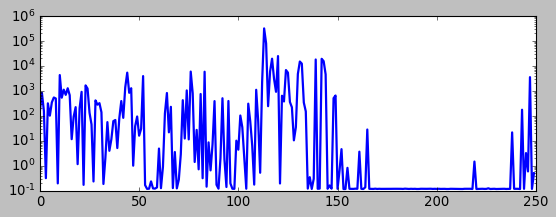

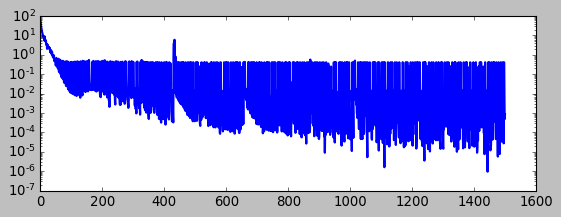

In [16]:
import matplotlib.pyplot as plt
from matplotlib import pyplot

loss_test_path = 'pointnet-master/log/test/loss_test.txt'
loss_train_path = 'pointnet-master/log/train/loss_train.txt'
loss_test = open(loss_test_path, 'r')
loss_train = open(loss_train_path, 'r')
test = [eval(line) for line in loss_test]
train = [eval(line) for line in loss_train]
len_test = len(test)
len_train = len(train)

#a = [ pow(10,i) for i in range(10) ]
pyplot.subplot(2,1,1)
pyplot.plot(test, color='blue', lw=2)
pyplot.yscale('log')
pyplot.show()

pyplot.subplot(2,1,1)
pyplot.plot(train, color='blue', lw=2)
pyplot.yscale('log')
pyplot.show()

In [2]:
SIDE_LENGTH = 3
print 'output/vol/cube/failed/%dx%d_failed.txt' % (SIDE_LENGTH, SIDE_LENGTH)
fail_out = open('output/vol/cube/failed/%dx%d_failed.txt' % (SIDE_LENGTH, SIDE_LENGTH), 'w')

output/vol/cube/failed/3x3_failed.txt
